In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
#Some basic options in pandas for better readability and usage
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None) #automatic linebreaks and multiline cells

In [3]:
df = pd.read_csv('../input/indian-food-101/indian_food.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


# Data Cleaning and Transformation

In [5]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

region    1
dtype: int64

'region' has a missing value.<br>
Since 'region' is an important atrribute, we cannot replace its value with a default one. So instead we will remove the row altogether.

In [6]:
df = df.dropna(subset=['region'])

print('Missing "region" values after removal : ', df['region'].isnull().sum())

Missing "region" values after removal :  0


In [7]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

In [8]:
df.state.unique()

array(['West Bengal', 'Rajasthan', 'Punjab', 'Uttar Pradesh', '-1',
       'Odisha', 'Maharashtra', 'Uttarakhand', 'Assam', 'Bihar',
       'Andhra Pradesh', 'Karnataka', 'Telangana', 'Kerala', 'Tamil Nadu',
       'Gujarat', 'Tripura', 'Manipur', 'Nagaland', 'NCT of Delhi',
       'Jammu & Kashmir', 'Chhattisgarh', 'Haryana', 'Madhya Pradesh',
       'Goa'], dtype=object)

In [9]:
df.region.unique()

array(['East', 'West', 'North', '-1', 'North East', 'South', 'Central'],
      dtype=object)

In [10]:
df.state.value_counts()

state
Gujarat            35
Punjab             32
Maharashtra        30
West Bengal        24
-1                 24
Assam              21
Tamil Nadu         20
Andhra Pradesh     10
Kerala              8
Uttar Pradesh       8
Odisha              7
Karnataka           6
Rajasthan           6
Telangana           5
Bihar               3
Goa                 3
Manipur             2
Jammu & Kashmir     2
Madhya Pradesh      2
Uttarakhand         1
Tripura             1
Nagaland            1
NCT of Delhi        1
Chhattisgarh        1
Haryana             1
Name: count, dtype: int64

Since there are 24 records with '-1' as State, so we shall convert them to 'Others' so that we do not lose any data. 
<br>
The same can be seen with region, flavor_profile, prep_time and co

In [11]:
df.loc[df['state'] == '-1', 'state'] = 'Others'
df.loc[df['region'] == '-1', 'region'] = 'Others'
df.loc[df['flavor_profile'] == '-1', 'flavor_profile'] = 'other'

df.loc[df['prep_time'] == -1, 'prep_time'] = 0
df.loc[df['cook_time'] == -1, 'cook_time'] = 0

In [12]:
df.dtypes

name              object
ingredients       object
diet              object
prep_time          int64
cook_time          int64
flavor_profile    object
course            object
state             object
region            object
dtype: object

In [13]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East


Let us transform the 'ingredients' column from a comma seperated single string to a list of ingredients.

In [14]:
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East


In [15]:
# Turning the ingredients column into list instead of a single string
ingredients = []

for row in df['ingredients']:
    item = row.lower().strip().split(',')
    ingredients.append(item)
    
df['ingredients'] = ingredients
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"[maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"[gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"[carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"[flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom]",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"[milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water]",vegetarian,15,40,sweet,dessert,West Bengal,East


New column 'total_time' added which is the summation of 'prep_time' and 'cook_time'

In [16]:
df['total_time'] = df.prep_time + df.cook_time
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time
0,Balu shahi,"[maida flour, yogurt, oil, sugar]",vegetarian,45,25,sweet,dessert,West Bengal,East,70
1,Boondi,"[gram flour, ghee, sugar]",vegetarian,80,30,sweet,dessert,Rajasthan,West,110
2,Gajar ka halwa,"[carrots, milk, sugar, ghee, cashews, raisins]",vegetarian,15,60,sweet,dessert,Punjab,North,75
3,Ghevar,"[flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom]",vegetarian,15,30,sweet,dessert,Rajasthan,West,45
4,Gulab jamun,"[milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water]",vegetarian,15,40,sweet,dessert,West Bengal,East,55


In [17]:
df.to_csv('indianfood101dataset-cleaned.csv', index=False)

# Analysis and Vizualizations

Text(0.5, 1.0, 'Vegetarian vs. Non-Vegetarian recipes')

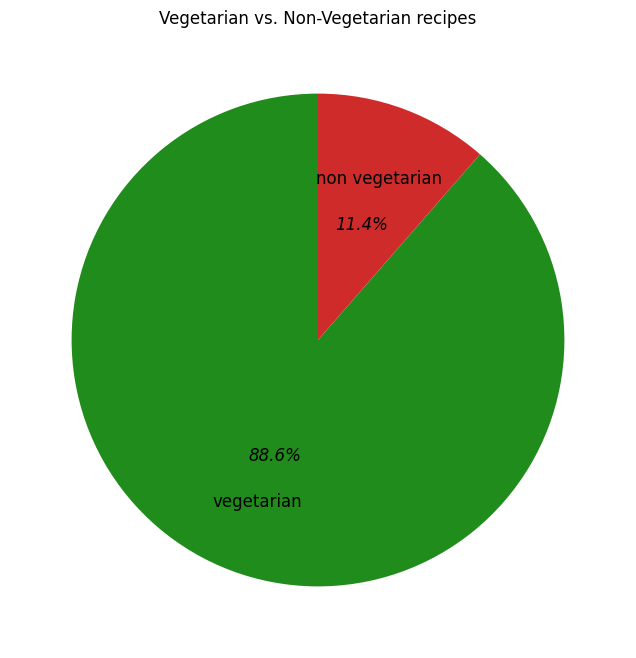

In [18]:
diet_pie = df['diet'].value_counts().reset_index()


plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(diet_pie['count'], 
                                    labels=diet_pie['diet'], 
                                    autopct='%1.1f%%', 
                                    textprops={'fontsize':12}, 
                                    colors=['#208c1c','#cf2b2b'],
                                    startangle = 90, 
                                    labeldistance=0.7,
                                    pctdistance=0.5)

# Customize text labels
for text in texts:
    text.set_horizontalalignment('center') 
# Customize percent labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')
    
plt.title("Vegetarian vs. Non-Vegetarian recipes")


Text(0, 0.5, 'Number of dishes')

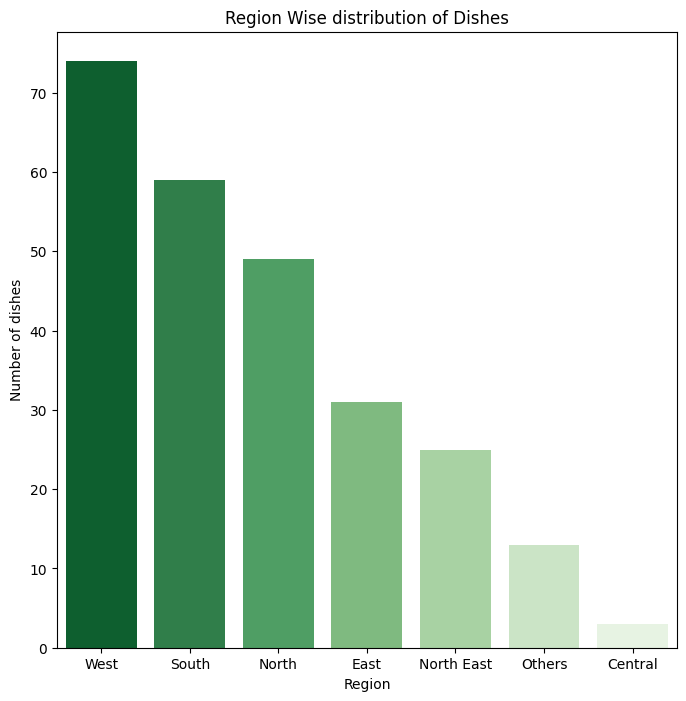

In [19]:
regions = df['region'].value_counts()

plt.figure(figsize=(8,8))
sns.barplot(x=regions.index, y=regions.values, palette='Greens_r')
plt.title("Region Wise distribution of Dishes")
plt.xlabel("Region")
plt.ylabel("Number of dishes")

Text(0, 0.5, 'Number of dishes')

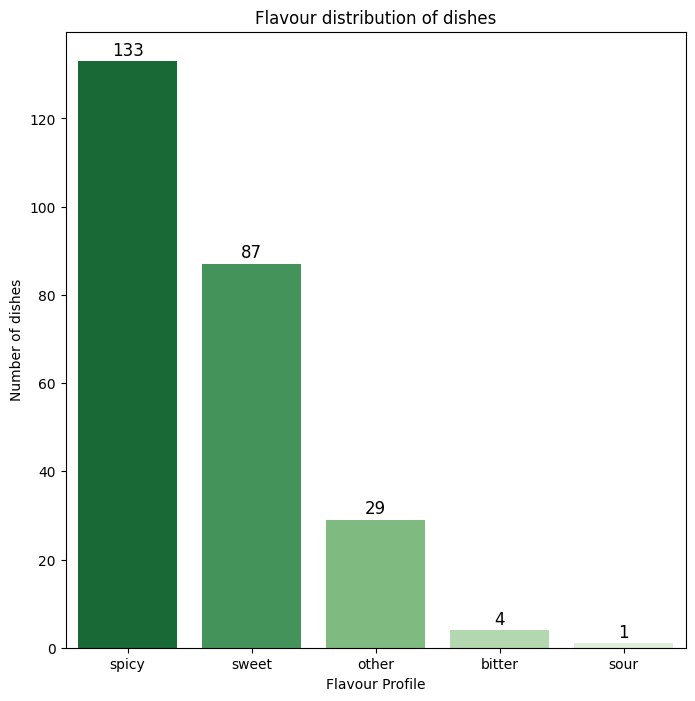

In [20]:
flavour = df['flavor_profile'].value_counts().reset_index()
# flavour = flavour[flavour['flavor_profile'] != 'other']


plt.figure(figsize=(8, 8))
plots = sns.barplot(x=flavour['flavor_profile'], y=flavour['count'], palette='Greens_r')
for bar in plots.patches:
    plots.annotate(int(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Flavour distribution of dishes")
plt.xlabel("Flavour Profile")
plt.ylabel("Number of dishes")

Lets look at the distribution of Spicy food across India.

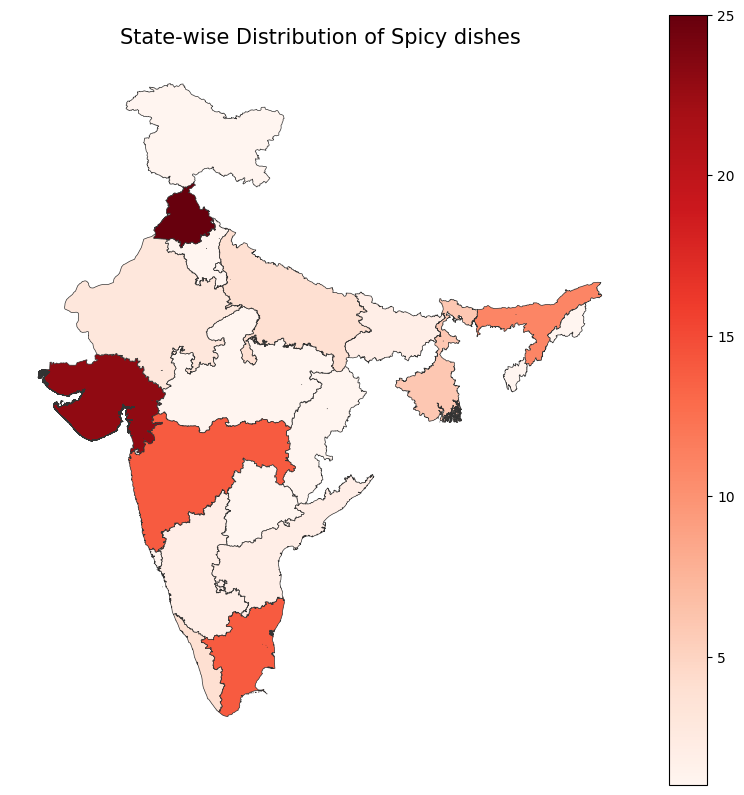

In [21]:
#shape file from India GIS dataset
shp_ind = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
#spicy food subset
spicy_only = df[df['flavor_profile'] == 'spicy']
spicy_state = spicy_only.state.value_counts().reset_index()
spicy_state.columns = ['state','count']

#merged shp file with state wise spicy dishes
merged = shp_ind.set_index('st_nm').join(spicy_state.set_index('state'))

#plotting
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Spicy dishes',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='count', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

In [22]:
# Turning the ingredients column into list instead of a single string
spicy_ingredients = []
df_spicy = df[df['flavor_profile'] == 'spicy']

for row in df_spicy['ingredients']:
    #already split this column while cleaning data
    spicy_ingredients.append(row)

In [23]:
#generate list of all ingredients with their counts
#only for spicy dishes

spicy_ing_flattened = []
for item in spicy_ingredients:
    spicy_ing_flattened.extend(item)
    
spicy_ing_flattened = [x.strip(' ') for x in spicy_ing_flattened]

spicy_ing_true = pd.Series(spicy_ing_flattened).value_counts()

Text(0, 0.5, 'Ingredient Name')

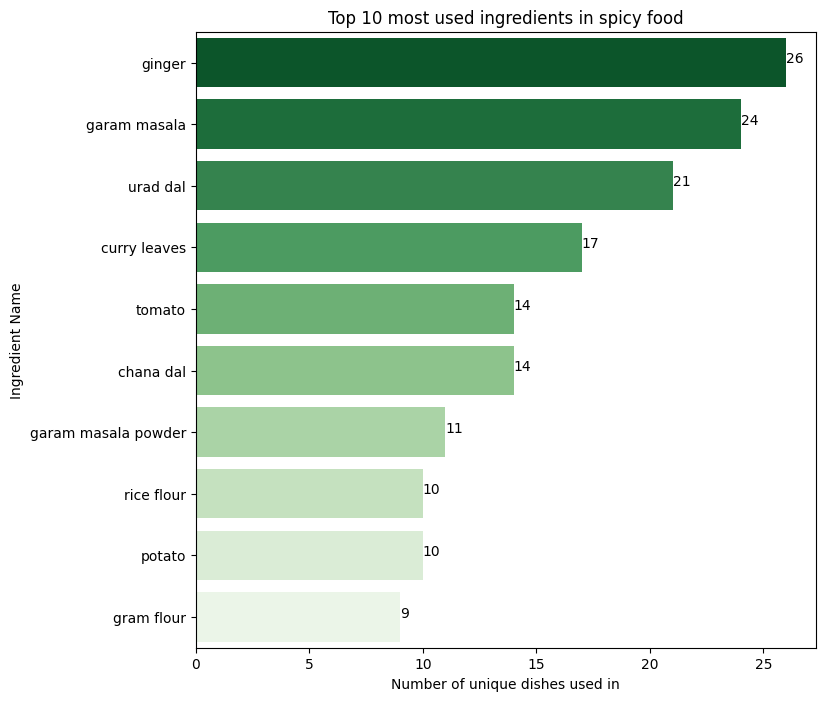

In [24]:
top_spicy_ingredients = spicy_ing_true.head(10)

plt.figure(figsize=(8, 8))
plots = sns.barplot(x=top_spicy_ingredients.values, y=top_spicy_ingredients.index, palette='Greens_r')
for bar in plots.patches:
    plots.annotate(int(bar.get_width()), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 2))

# plt.annotate(text, xy, xytext=None, arrowprops=None, **kwargs)
# text − the text string to be displayed as the annotation
# xy − the (x, y) coordinates of the point to be annotated 

plt.title("Top 10 most used ingredients in spicy food")
plt.xlabel("Number of unique dishes used in")
plt.ylabel("Ingredient Name")

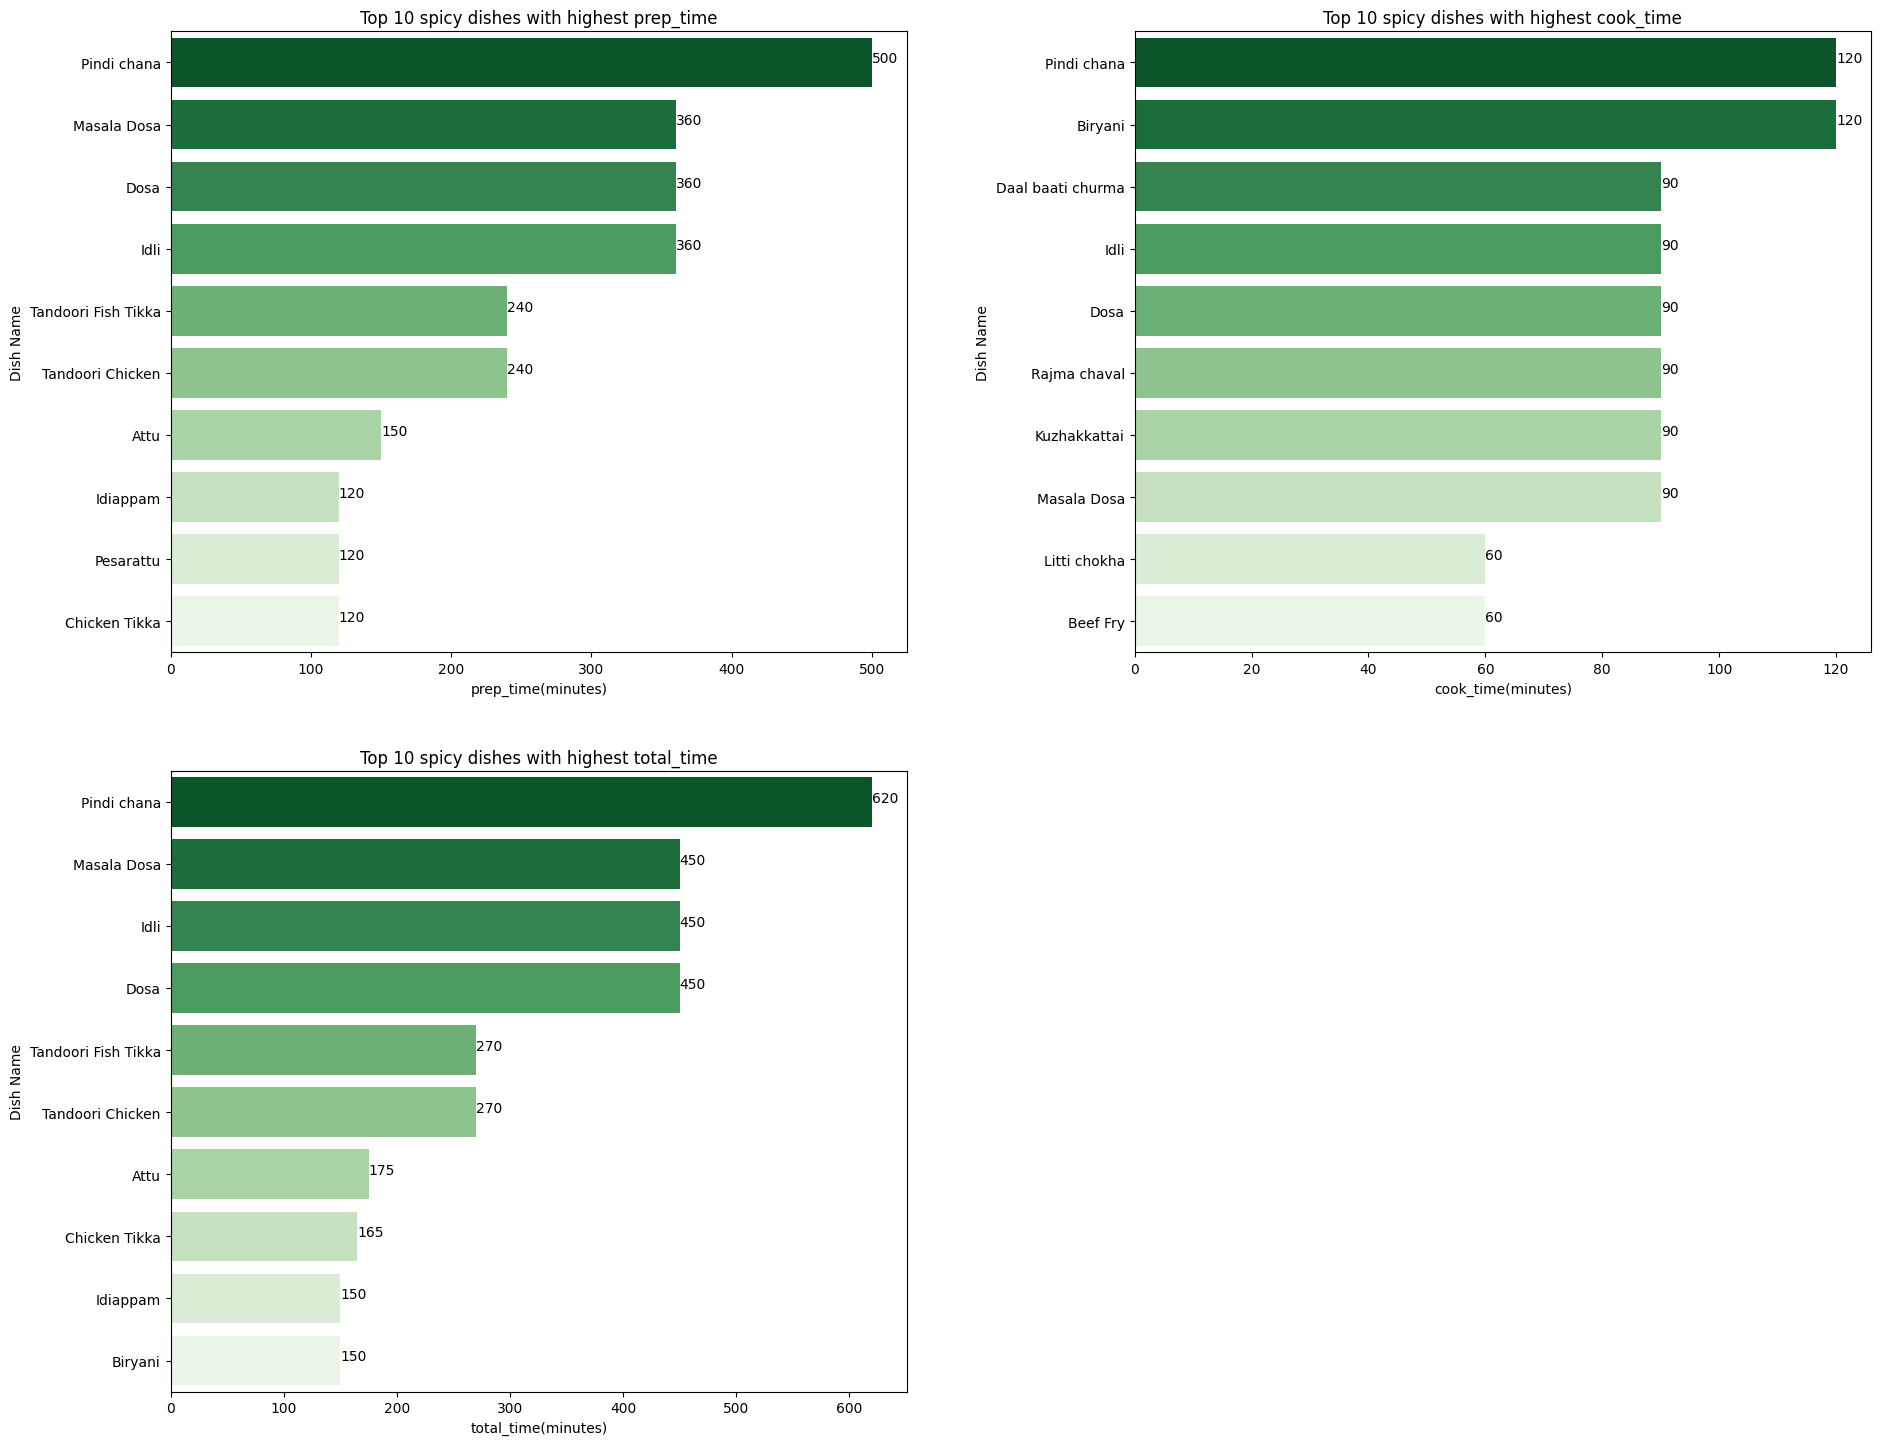

In [25]:
time_plots = ['prep_time','cook_time','total_time']
plt.figure(figsize=(20, 30))

for i, feature in enumerate(time_plots, start=1):
    plt.subplot(4, 2, i)
    plt.tight_layout(pad=5.0) #spacing in between the plots
    df_plot = df_spicy.sort_values(feature, ascending = False).head(10)
    plots = sns.barplot(x=df_plot[feature],y=df_plot['name'], palette='Greens_r')
    for bar in plots.patches:
        plots.annotate(int(bar.get_width()), 
                        (bar.get_width(), bar.get_y() + bar.get_height() / 2))
    plt.title("Top 10 spicy dishes with highest " + feature)
    plt.xlabel(feature + "(minutes)")
    plt.ylabel("Dish Name")

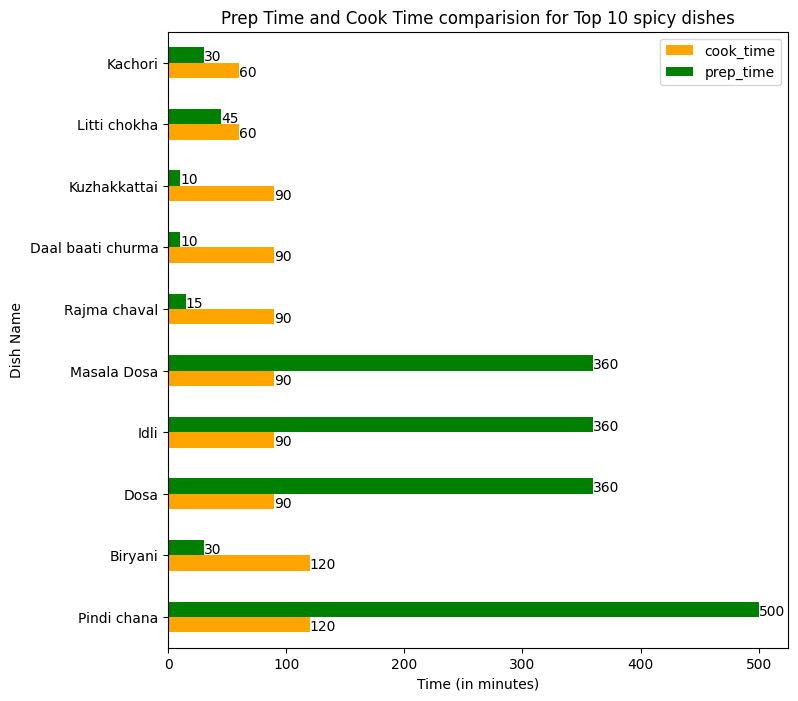

In [26]:
time_plots = ['cook_time', 'prep_time']

df_plot = df_spicy.sort_values(time_plots, ascending = [False, False]).head(10)
plots = df_plot.plot.barh(x='name' , y=time_plots , color =['orange', 'green'],
                        title='Prep Time and Cook Time comparision for Top 10 spicy dishes',
                        xlabel='Time (in minutes)', ylabel='Dish Name', figsize=(8,8))
for bar in plots.patches:
    plots.annotate(int(bar.get_width()), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 8), fontsize=10)

Text(0, 0.5, 'Cooking time (minutes)')

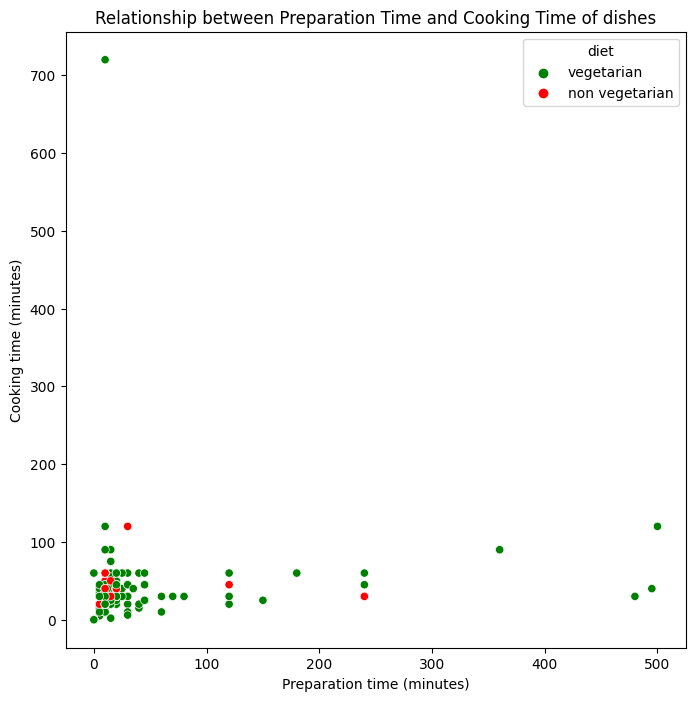

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x='prep_time', y='cook_time', hue='diet', palette=['green','red'])
plt.title("Relationship between Preparation Time and Cooking Time of dishes")
plt.xlabel("Preparation time (minutes)")
plt.ylabel("Cooking time (minutes)")

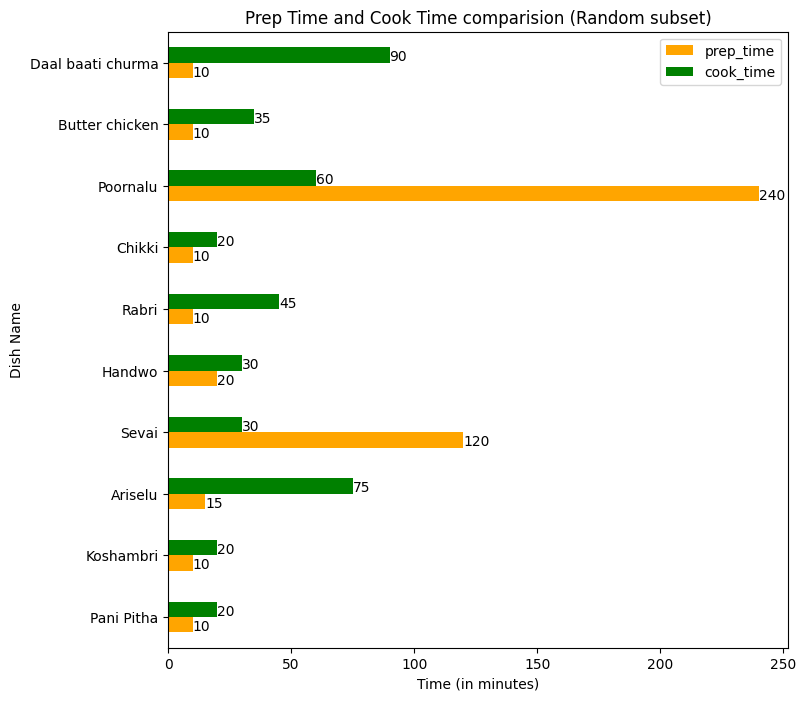

In [28]:
time_plot_sample = df.query('prep_time > 0 & cook_time > 0').sample(10)

plots = time_plot_sample.plot.barh(x='name' , y=['prep_time', 'cook_time'] , color =['orange', 'green'],
                                  title='Prep Time and Cook Time comparision (Random subset)',
                                  xlabel='Time (in minutes)', ylabel='Dish Name', figsize=(8,8))
for bar in plots.patches:
    plots.annotate(int(bar.get_width()), 
                   (bar.get_width(), bar.get_y() + bar.get_height() / 8), fontsize=10)

# Fidings
<hr/>

* The majority of dishes in this dataset are vegetarian.
* The dishes predominantly hails from the Western region.
* Most dishes are notably spicy.
* Ginger, Garam Masala, and Urad Dal rank among the most frequently utilized ingredients in spicy cuisine.
* Spicy dishes are notably prevalent in regions such as Punjab, Gujarat, Maharashtra, Assam, and Tamil Nadu.
* Pindi Chana stands out as a dish requiring substantial preparation time. Similarly, Masala Dosa, Idli, and Dosa also demand considerable preparation.
* Most dishes boast preparation and cooking times of less than two hours.